**Name:** \_Wenkai JIN\_

**EID:** \_40156074\_

# Tutorial 2: Logistic Regression and Support Vector Machine

In this tutorial you will predict whether a face image is male or female using logistic regression model, support vector machine, naive bayes, and KNN.

First we need to initialize Python.  Run the below cell.

**Note**: The recommended version of scikit-learn for this tutorial is **1.3**. There may be bugs if you use other versions.

In [2]:
%matplotlib inline
import IPython.core.display
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt

import matplotlib
from numpy import *
import sklearn
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)
print("Your sklearn version: ", sklearn.__version__)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27812\928511544.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.core.display.set_matplotlib_formats("svg")


Your sklearn version:  1.2.2


## 1. Loading Data and Pre-processing
We first need to load the images.  Download `photos-bw.zip` and put it in the same directory as this ipynb file.  **Do not unzip the file.** Then run the following cell to load the images.

In [3]:
imgdata = []
genders = []

# load the zip file
filename = 'photos-bw.zip'
zfile = zipfile.ZipFile(filename, 'r')

for name in zfile.namelist():
    # check file name matches
    if fnmatch.fnmatch(name, "photos-bw/*.png"):
        print("loading", name)
        # open file in memory, and parse as an image
        myfile = zfile.open(name)
        img = matplotlib.image.imread(myfile)
        myfile.close()

        # append to data
        imgdata.append(img)
        genders.append( int(name[len("photos-bw/")] == 'm') )  # 0 is female, 1 is male

zfile.close()
imgsize = img.shape
print("DONE: loaded {} images".format(len(imgdata)))

loading photos-bw/f-039-01.png
loading photos-bw/f-040-01.png
loading photos-bw/f-041-01.png
loading photos-bw/f-042-01.png
loading photos-bw/f-043-01.png
loading photos-bw/f1-001-0.png
loading photos-bw/f1-002-0.png
loading photos-bw/f1-003-0.png
loading photos-bw/f1-004-0.png
loading photos-bw/f1-005-0.png
loading photos-bw/f1-006-0.png
loading photos-bw/f1-007-0.png
loading photos-bw/f1-008-0.png
loading photos-bw/f1-009-0.png
loading photos-bw/f1-010-0.png
loading photos-bw/f1-011-0.png
loading photos-bw/f1-012-0.png
loading photos-bw/f1-013-0.png
loading photos-bw/f1-014-0.png
loading photos-bw/f1-015-0.png
loading photos-bw/m-063-01.png
loading photos-bw/m-064-01.png
loading photos-bw/m-065-01.png
loading photos-bw/m-067-01.png
loading photos-bw/m-069-01.png
loading photos-bw/m-070-01.png
loading photos-bw/m-073-01.png
loading photos-bw/m-074-01.png
loading photos-bw/m-075-01.png
loading photos-bw/m-077-01.png
loading photos-bw/m-083-01.png
loading photos-bw/m-085-01.png
loading 

Each image is a 45x40 array of pixel values.  Run the below code to show an example:

(45, 40)


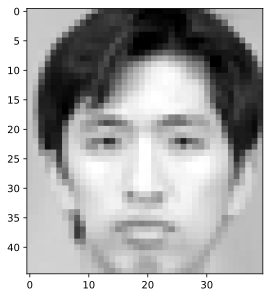

In [16]:
print(img.shape)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

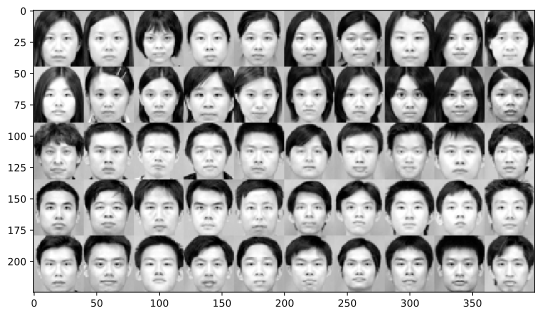

In [5]:
# function to make an image montage
def image_montage(X, imsize=None, maxw=10):
    """X can be a list of images, or a matrix of vectorized images.
      Specify imsize when X is a matrix."""
    tmp = []
    numimgs = len(X)

    # create a list of images (reshape if necessary)
    for i in range(0,numimgs):
        if imsize != None:
            tmp.append(X[i].reshape(imsize))
        else:
            tmp.append(X[i])

    # add blanks
    if (numimgs > maxw) and (mod(numimgs, maxw) > 0):
        leftover = maxw - mod(numimgs, maxw)
        meanimg = 0.5*(X[0].max()+X[0].min())
        for i in range(0,leftover):
            tmp.append(ones(tmp[0].shape)*meanimg)

    # make the montage
    tmp2 = []
    for i in range(0,len(tmp),maxw):
        tmp2.append( hstack(tmp[i:i+maxw]) )
    montimg = vstack(tmp2)
    return montimg

plt.figure(figsize=(9,9))
plt.imshow(image_montage(imgdata), cmap='gray', interpolation='nearest')
plt.show()

Each image is a 2d array, but the classifier algorithms work on 1d vectors. Run the following code to convert all the images into 1d vectors by flattening.  The result should be a matrix where each row is a flattened image.

In [6]:
X = empty((50, prod(imgdata[0].shape))) # create empty array
for i,img in enumerate(imgdata):
    X[i,:] = ravel(img)           # for each image, turn it into a vector
Y = asarray(genders)  # convert list to numpy array
print(X.shape)
print(Y.shape)

(50, 1800)
(50,)


Next we will shift the pixel values so that gray is 0.0, black is -0.5 and white is 0.5.

In [7]:
print("Before: min={}, max={}".format(X.min(), X.max()))
X -= 0.5
print("After:  min={}, max={}".format(X.min(), X.max()))

Before: min=0.0, max=1.0
After:  min=-0.5, max=0.5


Finally, split the dataset into a training set and testing set. We select 80% for training and 20% for testing.

In [9]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y,
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)

(40, 1800)
(10, 1800)


## 2. Logistic Regression
Train a logistic regression classifier.  Use cross-validation to select the best $C$ parameter.

In [11]:
### INSERT YOUR CODE HERE
## HINT
# 1. linear_model.LogisticRegressionCV()
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

clf.fit(trainX,trainY)

print(f"Best C parameter: {clf.C_[0]}")



Best C parameter: 0.046415888336127774


Use the learned model to predict the genders for the training and testing data. What is the accuracy on the training set? What is the accuracy on the testing set?

In [19]:
### INSERT YOUR CODE HERE
## HINT
# 1. To calculate the accuracy: metrics.accuracy_score(label, pred)
predY = clf.predict(testX)
accuracy = metrics.accuracy_score(predY,testY)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.8


### 2.1 Analyzing the Classifier
Run the below code to show the hyperplane parameter $\mathbf{w}$ as an image.  

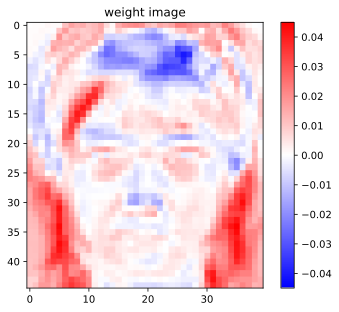

In [20]:
# logreg is the learned logistic regression model
wimg = clf.coef_.reshape(imgsize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("weight image")
plt.show()

Recall that the classifier prediction is based on the sign of the function $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}+b = \sum_{i=1}^P w_ix_i + b$.  Here each $x_i$ is a pixel in the face image, and $w_i$ is the corresponding weight.  Hence, the function is multiplying face image by the weight image, and then summing over all pixels.

In order for $f(\mathbf{x})$ to be positive, then the positive values of the weight image (red regions) should match the positive values in the face image (white pixels), and the negative values of the weight image (blue regions) should be matched with negative values in the face image (black pixels).

Hence, we can have the following interpretation:
<table>
<tr><th>Class</th><th>red regions (positive weights)</th><th>blue regions (negative weights)</th><th>white regions (weights near 0)</th></tr>
<tr><td>+1 class (male)</td><td>white pixels in face image</td><td>black pixels in face image</td><td>region not important</td></tr>
<tr><td>-1 class (female)</td><td>black pixels in face image</td><td>white pixels in face image</td><td>region not important</td></tr>
</table>
  
_Looking at the weight image, what parts of the face image is the classifier looking at to determine the gender?  Does it make sense?_

ANSWER: 

- **INSERT YOUR ANSWER HERE**

I believe the most important factor is the red region, as it plays a significant role in the images and serves as a key area for decision-making. The reason the red region influences gender identification is that most women have long hair, which creates a noticeable difference between male and female images in this area. In short, the exposed black hair feature in the red region helps the computer make its judgment. This approach aligns with how we commonly recognize females in daily life, and through machine learning, the computer is trained to identify this critical feature.

Now let's look at the misclassified faces in the test set.  Run the below code to show the misclassifed and correctly classified faces.

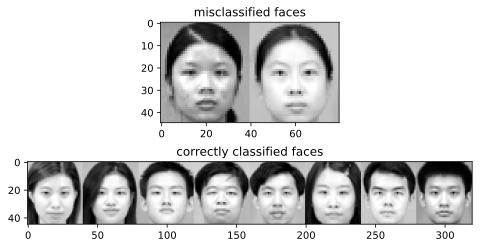

In [21]:
# predYtest are the class predictions on the test set.
predYtest = clf.predict(testX) 
# find misclassified test images
inds = where(predYtest != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)

plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

_Why did the classifier make incorrect predictions on the misclassified faces?_
- **INSERT YOUR ANSWER HERE**
 
Based on the previous question about what factors influence the decision-making process, I believe the main reason for incorrect predictions lies in the missing feature in the lower part of the image, specifically the absence of visible hair (black hair) in the red region. In the incorrect set of images, the two women have their hair tied up, which results in the lower part of the image lacking the distinctive feature of hair. In contrast, in the correct set of images, the women's hair is clearly visible, providing a strong feature in the lower part of the image. This distinction likely helps differentiate the images, as the presence of visible hair is an important cue in the images of females but absent in those of males. So, when the machine was well-trained and tested with these images, it made incorrect predictions for the women whose hair wasn’t visible in the lower part of the image.

## 3. Support Vector Machine
Now train a support vector machine (SVM) on the same training and testing data.  Use cross-validation to select the best $C$ parameter.

In [22]:
### INSERT YOUR CODE HERE
## HINT
# 1. C: paramgrid = {'C': logspace(-4,4,20)}
# 2. cross-validation: model_selection.GridSearchCV()
# 3. SVM: svm.SVC()

from sklearn import svm, model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

param_grid = {'C': np.logspace(-4, 4, 20)}

svm_clf = svm.SVC(kernel='linear')

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(trainX, trainY)

best_svm = grid_search.best_estimator_

print("Best C parameter:", grid_search.best_params_)


Best C parameter: {'C': 0.004832930238571752}


Calculate the training and test accuracy for the SVM classifier.

In [23]:
### INSERT YOUR CODE HERE
## HINT
# 1. To calculate the accuracy: metrics.accuracy_score(label, pred)

y_test_pred = best_svm.predict(testX)

test_accuracy = metrics.accuracy_score(testY, y_test_pred)

print(f"Accuracy of svm on test set: {test_accuracy}")

Accuracy of svm on test set: 0.8


Similar to before, plot an image of the hyperplane parameters $w$, and view the misclassified and correctly classified test images.

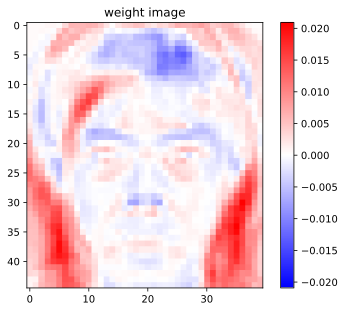

In [54]:
### INSERT YOUR CODE HERE

wimg_svm = best_svm.coef_.reshape(imgsize)      #
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg_svm.max(), -wimg_svm.min())
plt.imshow(wimg_svm, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("weight image")
plt.show()

Now let's also look at the misclassified faces in the test set. To show the misclassifed and correctly classified faces like above.

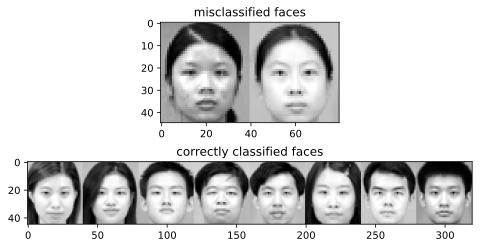

In [50]:
# find misclassified test images
predYtest_svm = best_svm.predict(testX)
inds = where(predYtest_svm != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest_svm == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)

plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

_Are there any differences between the $w$ for logistic regressiona and the $w$ for SVM?  Is there any interpretation for the differences?_

Logistic Regression:
In logistic regression, the weight $} are directly related to the log-odds of the target variable (binary classification) or the probabilities of each class (multi-class classification).
The weights ( \mathbf{w}_{\text{LR}} ) are typically interpretable as the contribution of each feature to the prediction of the target class probabilities.
Logistic regression aims to maximize the likelihood of the observed data under the logistic model assumptions, which directly influences the weights ( \mathbf{w}_{\text{LR}} ).
Linear SVM:
In linear SVM, the weights ( \mathbf{w}_{\text{SVM}} ) are determined by the support vectors found during training, which are the data points closest to the decision boundary.
The SVM aims to maximize the margin between different classes, and the weights ( \mathbf{w}_{\text{SVM}} ) are orthogonal to this margin and can be influenced by the support vectors.
The weights ( \mathbf{w}_{\text{SVM}} ) are not directly interpretable in terms of class probabilities but rather in terms of their contribution to defining the decision boundary.
Interpretation of Differences:
Sparsity: SVM weights ( \mathbf{w}{\text{SVM}} ) tend to be sparse (many zeros) because only support vectors contribute significantly to the decision boundary, whereas logistic regression weights ( \mathbf{w}{\text{LR}} ) are influenced by all training examples.
Scaling: The scale of SVM weights ( \mathbf{w}{\text{SVM}} ) can be influenced by the regularization parameter ( C ), whereas logistic regression weights ( \mathbf{w}{\text{LR}} ) are directly influenced by the maximum likelihood estimation process.
Decision Boundary: SVM focuses on finding the best separating hyperplane (or planes in the case of non-linear SVMs), while logistic regression focuses on modeling probabilities directly.
In summary, while both logistic regression and SVM aim to classify data, they approach the problem differently, leading to potentially different weight vectors ( \mathbf{w} ). The interpretation of these differences lies in the optimization objectives and underlying assumptions of each model, affecting how they generalize to unseen data and how we interpret the i
重试
删除
固定
复制


- **INSERT YOUR ANSWER HERE**

In logistic regression, the weights $w_{LR}$ are directly related to the log-odds of the target variable(binary classificaiton) or the probabilities of each class(mult-class classification). The weights $w_{LR}$ are typically interpretable as the contribution of each feature to the prediction of the target class probabilities. Logistic regression aims to maximize the likelihood of the observed data under the logistic model assumptions, which directly influences the weights.

In SVM, the weight $w_{SVM}$ are determined by the support vectors found during training, which are the data points closest to the decision boundary. The SVM aims to maximize the margin between different classes, and the weights are orthogonal to this margin and can be influenced by the support vectors. The weights are not directly interpretable in terms of class probabilities but rather in terms of their contribution to defining the decision boundary.

interpretation of differences: SVM weights tend to be sparse because only support vectors contribute significantly to the decision boundary, whereas logistic regression weights are influenced by all training examoles. Also, the scale of SVM weights can be influenced by the regularization parameter C, whereas logistic regression weights are directly influenced by the maximum likelihood estimation process. As for the decision boundary SVM focuses on finding the best separating hyperplane, while logistic regression focuses on modeling probabilities directly.

## 4. Naive Bayes
Next, we train a naive bayes (NB), which is delieved at last lecture, on the same training and testing data. Then, showing the accuracy of training and testing set.

In [42]:
### INSERT YOUR CODE HERE
## HINT
# 1. naive_bayes.GaussianNB()
# 2. metrics.accuracy_score()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
param_grid = {
}
grid_search_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search_gnb.fit(trainX,trainY)

best_gnb = grid_search_gnb.best_estimator_
y_testpred = best_gnb.predict(testX)

test_accuracy = metrics.accuracy_score(testY, y_testpred)

print(f"Accuracy of NB on test set: {test_accuracy}")

Accuracy of NB on test set: 0.9


Now let's also look at the misclassified faces in the test set. To show the misclassifed and correctly classified faces like above.

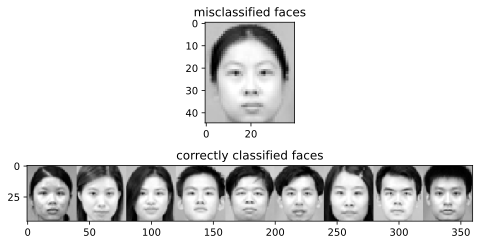

In [44]:
# predYtest are the class predictions on the test set.
# find misclassified test images
inds = where(y_testpred != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(y_testpred == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)

plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

## 5. K Nearest Neighbor
In addition, to train a K Nearest Neighbor (KNN) model, which is delieved at last lecture, on the same training and testing data. Using cross-validation to select the best  K  parameter. Then, showing the accuracy of training and testing set.

In [36]:
### INSERT YOUR CODE HERE
## HINT
# 1. K: paramgrid = {'n_neighbors': [3,5,10]}
# 2. cross-validation: model_selection.GridSearchCV()
# 3. neighbors.KNeighborsClassifier()
# 4. metrics.accuracy_score()
from sklearn.neighbors import KNeighborsClassifier
paramgrid = {'n_neighbors': [3,5,10]}
clf_KNN = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=paramgrid, cv=10, n_jobs=-1)

clf_KNN.fit(trainX,trainY)
print(clf_KNN.best_params_)

# y_train_pred = clf_KNN.predict(trainX)
# train_accuracy = accuracy_score(trainY, y_train_pred)
# print(f"Training set accuracy with best K: {train_accuracy:.2f}")



# y_test_pred = clf_KNN.predict(testX)
# test_accuracy = accuracy_score(testY, y_test_pred)
# print(f"Testing set accuracy with best K: {test_accuracy:.2f}")

{'n_neighbors': 3}


In [40]:

# predict from the model
predYtrain_KNN = clf_KNN.predict(trainX)
predYtest_KNN = clf_KNN.predict(testX)

# calculate accuracy
acc      = metrics.accuracy_score(trainY, predYtrain_KNN)
print("train accuracy =", acc)

# calculate accuracy
acc      = metrics.accuracy_score(testY, predYtest_KNN)
print("test accuracy  =", acc)

train accuracy = 0.875
test accuracy  = 0.8


Now let's also look at the misclassified faces in the test set. To show the misclassifed and correctly classified faces like above.

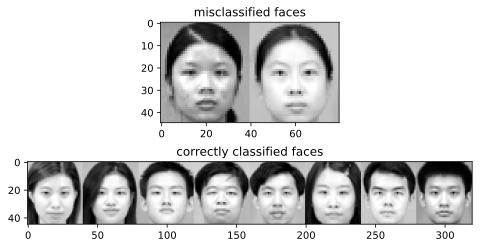

In [41]:
# predYtest are the class predictions on the test set.KNN
# find misclassified test images
inds = where(predYtest_KNN != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest_KNN == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)

plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()